<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_7/Rank_2_Uma_ram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Sprint #7: Bank Marketing
Predict if a Customer will subscribe the product or not


# Objective

The marketing team of the bank has data related to direct marketing campaigns of the previous year. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required, in order to assess if the product would be ('yes') or not ('no') subscribed. The bank conducted a similar marketing campaign this year too and stored the data related to each phone call

The data is related to direct marketing campaigns of a Portuguese banking institution.

To load the training data in your jupyter notebook, use the below command:

```

import pandas as pd

bank_marketing_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/training_set_label.csv" )

```

**Data Description**

bank client data:

age: Age of the client

job: Type of job

marital: Marital status of the client

education: Highest education of the client

default: Has credit in default?

balance: The amount in the client’s bank account in the bank

housing: Whether the client has housing loan or not

loan: Whether the client has any personal loan or not

 

**related with the last contact of the current campaign:**

contact: Contact communication type

month: Last contact month of the year

day_of_week: Last contact day of the week

duration: Last contact duration in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

 

**other attributes:**

campaign: number of contacts performed during this campaign and for this client

pdays: number of days that passed by after the client was last contacted from a previous campaign

previous: number of contacts performed before this campaign and for this client

poutcome: outcome of the previous marketing campaign

 

**Output variable (desired target):**

y: has the client subscribed a term deposit?

Test Dataset
Load the test data (name it as test_data). You can load the data using the below command.


```
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/testing_set_label.csv)
```

Here the target column is deliberately not there as you need to predict it.


# **Load Libraries and datasets**

In [ ]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score
#Decisoin Tree classifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
bank_marketing_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/training_set_label.csv" )


In [ ]:
bank_marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
bank_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [ ]:
#No. of rows 
bank_marketing_data.shape[0]

45211

In [ ]:
#Chck is there any null values
bank_marketing_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [ ]:
bank_marketing_data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
bank_marketing_data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
bank_marketing_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
bank_marketing_data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
bank_marketing_data.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
bank_marketing_data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
bank_marketing_data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
bank_marketing_data.subscribe.value_counts()

0    39922
1     5289
Name: subscribe, dtype: int64

In [ ]:
bank_marketing_data[bank_marketing_data.duration == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,0
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,0
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,0


In [ ]:
#Copy the Dataset 

bank_data1 = bank_marketing_data.copy()
bank_data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
#Change month name to month number

def ChangeToMonthNumber(df):
  df["month"] = df["month"].apply(lambda x: datetime.datetime.strptime(x, "%b").month)
  return


In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
#call the function                                   
ChangeToMonthNumber(bank_data1)

In [ ]:
#Implement label encoding to these columns
ColumnsToLabelEncode=['job','marital','education','default','housing','loan','contact','poutcome']
bank_data1=MultiColumnLabelEncoder(ColumnsToLabelEncode).fit_transform(bank_data1)

In [ ]:
bank_data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


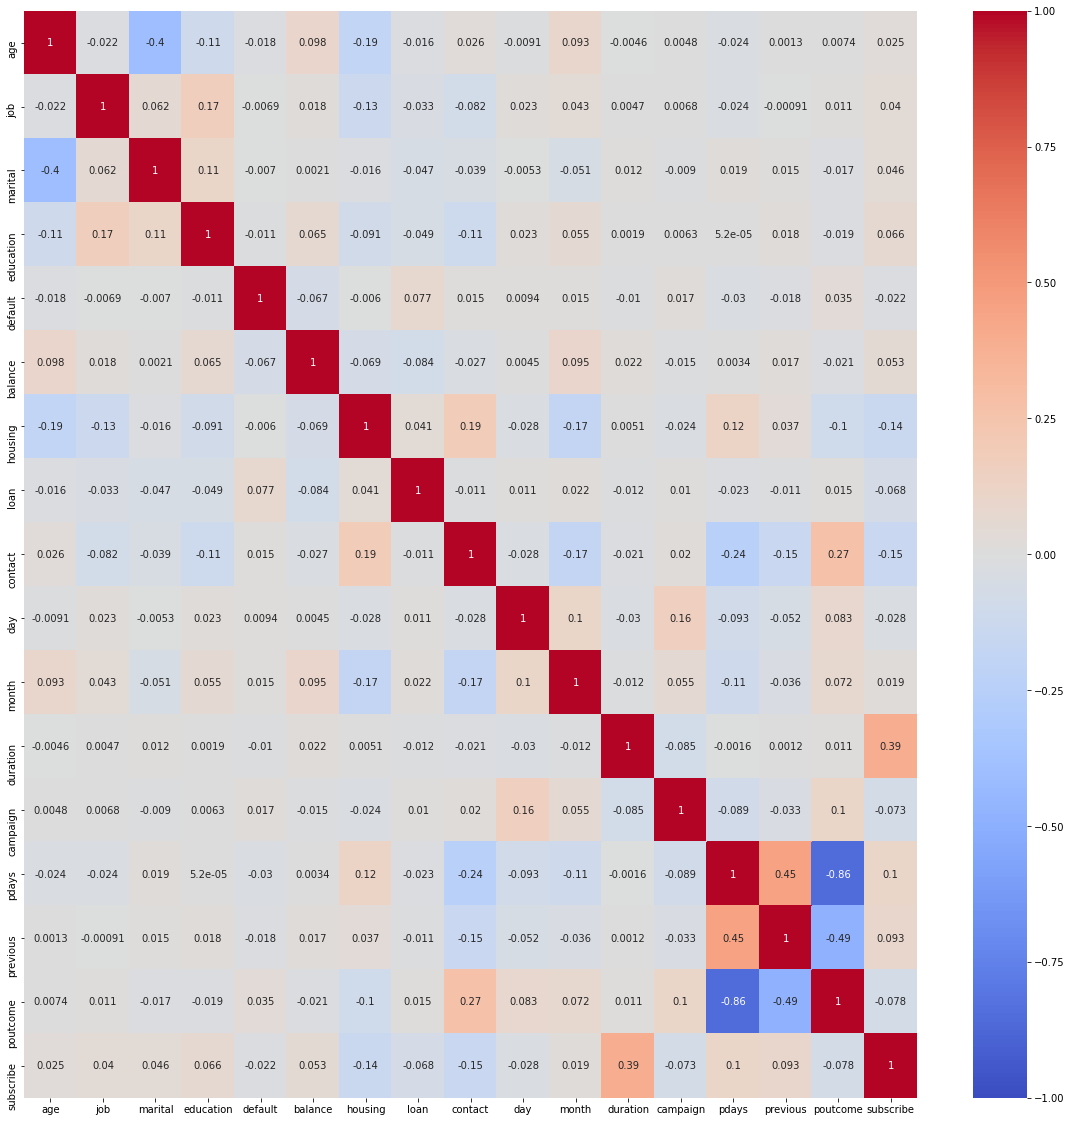

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(bank_data1.corr(),vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

# Split data

In [ ]:
X = bank_data1.drop('subscribe', axis=1)
y = bank_data1.subscribe

In [ ]:
#split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# Build Models

**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print('F1 Score is: ', np.sqrt(f1_score(y_test, pred_rfc))) 

F1 Score is:  0.746467635164619


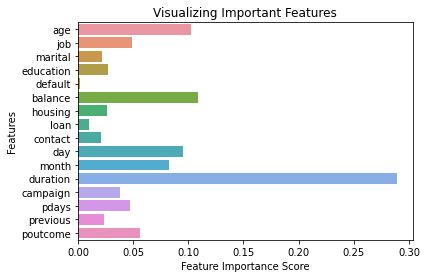

In [ ]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
sns.barplot(x=feat_importances, y=feat_importances.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()



In [ ]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

In [ ]:
print('F1 Score is: ', np.sqrt(f1_score(y_test, pred_gbc))) 

F1 Score is:  0.7145896010104964


In [ ]:
#XGBClassifier
xgb_model = XGBClassifier(random_state = 42 )
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)

In [ ]:
print('F1 Score is: ', np.sqrt(f1_score(y_test, pred_xgb))) 

F1 Score is:  0.7012868733182767


In [ ]:
#DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(random_state = 42)
model_dtc.fit(X_train, y_train)
pred_DTC = model_dtc.predict(X_test)

In [ ]:
print('F1 Score is: ', np.sqrt(f1_score(y_test, pred_DTC))) 

F1 Score is:  0.6966747078339824


# Implement Testing using test dataset

In [ ]:
bank_marketing_data_test  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/testing_set_label.csv" )

In [ ]:
bank_marketing_data_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
1,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
2,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
3,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
4,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


In [ ]:
ChangeToMonthNumber(bank_marketing_data_test)

In [ ]:
bank_marketing_data_test=MultiColumnLabelEncoder(ColumnsToLabelEncode).fit_transform(bank_marketing_data_test)

In [ ]:
target = rfc.predict(bank_marketing_data_test)#RFC

In [ ]:
#target = gbc.predict(bank_marketing_data_test)

In [ ]:
#target = model_knn.predict(bank_marketing_data_test)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = bank_marketing_data_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submissionResult.csv')         
files.download('submissionResult.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion**

With 2 changes in the dataset, using randomforestclassifier, this model is able to predict the better result. 